In [1]:
#install sqlite
pip install sqlite-database


Note: you may need to restart the kernel to use updated packages.


In [3]:
#import libraries
import sqlite3
import csv
import numpy as np
import pandas as pd

syntax: sqlite3.connect(database, timeout=5.0, detect_types=0, isolation_level='DEFERRED', check_same_thread=True, factory=sqlite3.Connection, cached_statements=128, uri=False,*, autocommit=sqlite3.LEGACY_TRANSACTION_CONTROL)

In [26]:
#df_covid = pd.read_csv('/Users/bayowaonabajo/Downloads/archive-4/us-counties-recent.csv')
#df_covid.head()

,date,county,state,fips,cases,deaths
0,2023-02-22,Autauga,Alabama,1001.0,19732,230.0
1,2023-02-22,Baldwin,Alabama,1003.0,69641,724.0
2,2023-02-22,Barbour,Alabama,1005.0,7451,112.0
3,2023-02-22,Bibb,Alabama,1007.0,8067,109.0
4,2023-02-22,Blount,Alabama,1009.0,18616,261.0


In [36]:

# Create a connection and db
# Syntax: conn = sqlite3.connect('databaseName.sqlite')
conn = sqlite3.connect('us_covid_recent_counties.db')

# Create a cursor object to navigate
cur = conn.cursor()

None is NULL
int is INTEGER
float is REAL
str is TEXT
bytes is BLOB

CREATE TABLE students(
name TEXT, 
age INTEGER,
grade INTEGER
);

In [61]:
cur.execute( '''CREATE TABLE covid_data_ (
        date TEXT,
        county TEXT,
        state TEXT,
        fips INTEGER,
        cases INTEGER,
        deaths REAL,
        country TEXT,
        year INTEGER
    )
''')

In [71]:
# utilizing the ny-times covid dataset showing covid case and death counts for U.S. counties 
data = "/Users/bayowaonabajo/Downloads/archive-4/us-counties-recent.csv"

# Open the file and read the data
with open(data, 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    next(csv_reader)  # Skip the header row

    for row in csv_reader:
        date = row[0]
        county = row[1]
        state = row[2]
        fips_str = row[3]
        deaths_str = row[5]  

        # Check if fips is empty
        if fips_str == '':
            continue  # Skip row

        # Check if empty
        if deaths_str == '':
            continue  # Skip row

        fips = int(fips_str)
        cases = int(row[4])
        deaths = float(deaths_str)
        
        country = "U.S.A"
        
        year = int(date.split('-')[0])
        
        cur.execute('''
            INSERT INTO covid_data_ (date, county, state, fips, cases, deaths, country, year)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        ''', (date, county, state, fips, cases, deaths, country, year))

    conn.commit()



In [75]:
# Load our dataFrame data into a SQLite Table
df_covid.to_sql('covid_data_', conn, if_exists='append', index=False)

97701

In [90]:
#First two states in the database
cur.execute('''
SELECT DISTINCT state
     FROM covid_data_
     ORDER BY state ASC
     LIMIT 2;
''')

cur.fetchall()

[('Alabama',), ('Alaska',)]

In [95]:
#Last two states in the database
cur.execute('''
SELECT DISTINCT state
     FROM covid_data_
     ORDER BY state DESC
     LIMIT 2;
''')

cur.fetchall()




[('Wyoming',), ('Wisconsin',)]

In [97]:
#Earliest and Latest record date

cur.execute("SELECT MIN(date) AS earliest_date FROM covid_data_;")
earliest_date = cur.fetchall()
print("Earliest date:", earliest_date)


cur.execute("SELECT MAX(date) AS latest_date FROM covid_data_;")
latest_date = cur.fetchall()
print("Latest date:", latest_date)

Earliest date: [('2023-02-22',)]
Latest date: [('2023-03-23',)]


In [88]:
# SELECT first 100 rows
cur.execute('''
SELECT *
    FROM covid_data_ 
    LIMIT 100;
''')

cur.fetchall()

[('2023-02-22', 'Autauga', 'Alabama', 1001, 19732, 230.0, 'U.S.A', 2023),
 ('2023-02-22', 'Baldwin', 'Alabama', 1003, 69641, 724.0, 'U.S.A', 2023),
 ('2023-02-22', 'Barbour', 'Alabama', 1005, 7451, 112.0, 'U.S.A', 2023),
 ('2023-02-22', 'Bibb', 'Alabama', 1007, 8067, 109.0, 'U.S.A', 2023),
 ('2023-02-22', 'Blount', 'Alabama', 1009, 18616, 261.0, 'U.S.A', 2023),
 ('2023-02-22', 'Bullock', 'Alabama', 1011, 3020, 54.0, 'U.S.A', 2023),
 ('2023-02-22', 'Butler', 'Alabama', 1013, 6518, 132.0, 'U.S.A', 2023),
 ('2023-02-22', 'Calhoun', 'Alabama', 1015, 41228, 675.0, 'U.S.A', 2023),
 ('2023-02-22', 'Chambers', 'Alabama', 1017, 10812, 176.0, 'U.S.A', 2023),
 ('2023-02-22', 'Cherokee', 'Alabama', 1019, 6732, 134.0, 'U.S.A', 2023),
 ('2023-02-22', 'Chilton', 'Alabama', 1021, 12956, 225.0, 'U.S.A', 2023),
 ('2023-02-22', 'Choctaw', 'Alabama', 1023, 2255, 63.0, 'U.S.A', 2023),
 ('2023-02-22', 'Clarke', 'Alabama', 1025, 8529, 114.0, 'U.S.A', 2023),
 ('2023-02-22', 'Clay', 'Alabama', 1027, 5134, 92.0

In [85]:
# Select variables specific for date "2023-03-23"
cur.execute('''
SELECT *
    FROM covid_data_
    WHERE 2023-03-23;
''')

cur.fetchall()

[('2023-02-22', 'Autauga', 'Alabama', 1001, 19732, 230.0, 'U.S.A', 2023),
 ('2023-02-22', 'Baldwin', 'Alabama', 1003, 69641, 724.0, 'U.S.A', 2023),
 ('2023-02-22', 'Barbour', 'Alabama', 1005, 7451, 112.0, 'U.S.A', 2023),
 ('2023-02-22', 'Bibb', 'Alabama', 1007, 8067, 109.0, 'U.S.A', 2023),
 ('2023-02-22', 'Blount', 'Alabama', 1009, 18616, 261.0, 'U.S.A', 2023),
 ('2023-02-22', 'Bullock', 'Alabama', 1011, 3020, 54.0, 'U.S.A', 2023),
 ('2023-02-22', 'Butler', 'Alabama', 1013, 6518, 132.0, 'U.S.A', 2023),
 ('2023-02-22', 'Calhoun', 'Alabama', 1015, 41228, 675.0, 'U.S.A', 2023),
 ('2023-02-22', 'Chambers', 'Alabama', 1017, 10812, 176.0, 'U.S.A', 2023),
 ('2023-02-22', 'Cherokee', 'Alabama', 1019, 6732, 134.0, 'U.S.A', 2023),
 ('2023-02-22', 'Chilton', 'Alabama', 1021, 12956, 225.0, 'U.S.A', 2023),
 ('2023-02-22', 'Choctaw', 'Alabama', 1023, 2255, 63.0, 'U.S.A', 2023),
 ('2023-02-22', 'Clarke', 'Alabama', 1025, 8529, 114.0, 'U.S.A', 2023),
 ('2023-02-22', 'Clay', 'Alabama', 1027, 5134, 92.0

In [99]:
# select county cases for Alabama and Alaska
cur.execute('''
SELECT county, cases, state
     FROM covid_data_
     WHERE state IN ('Alabama', 'Alaska');
''')

cur.fetchall()


[('Autauga', 19732, 'Alabama'),
 ('Baldwin', 69641, 'Alabama'),
 ('Barbour', 7451, 'Alabama'),
 ('Bibb', 8067, 'Alabama'),
 ('Blount', 18616, 'Alabama'),
 ('Bullock', 3020, 'Alabama'),
 ('Butler', 6518, 'Alabama'),
 ('Calhoun', 41228, 'Alabama'),
 ('Chambers', 10812, 'Alabama'),
 ('Cherokee', 6732, 'Alabama'),
 ('Chilton', 12956, 'Alabama'),
 ('Choctaw', 2255, 'Alabama'),
 ('Clarke', 8529, 'Alabama'),
 ('Clay', 5134, 'Alabama'),
 ('Cleburne', 4393, 'Alabama'),
 ('Coffee', 17094, 'Alabama'),
 ('Colbert', 21197, 'Alabama'),
 ('Conecuh', 3589, 'Alabama'),
 ('Coosa', 3755, 'Alabama'),
 ('Covington', 11765, 'Alabama'),
 ('Crenshaw', 4730, 'Alabama'),
 ('Cullman', 31438, 'Alabama'),
 ('Dale', 16436, 'Alabama'),
 ('Dallas', 10935, 'Alabama'),
 ('DeKalb', 22466, 'Alabama'),
 ('Elmore', 29745, 'Alabama'),
 ('Escambia', 12347, 'Alabama'),
 ('Etowah', 34137, 'Alabama'),
 ('Fayette', 5871, 'Alabama'),
 ('Franklin', 11996, 'Alabama'),
 ('Geneva', 7907, 'Alabama'),
 ('Greene', 2292, 'Alabama'),
 ('H

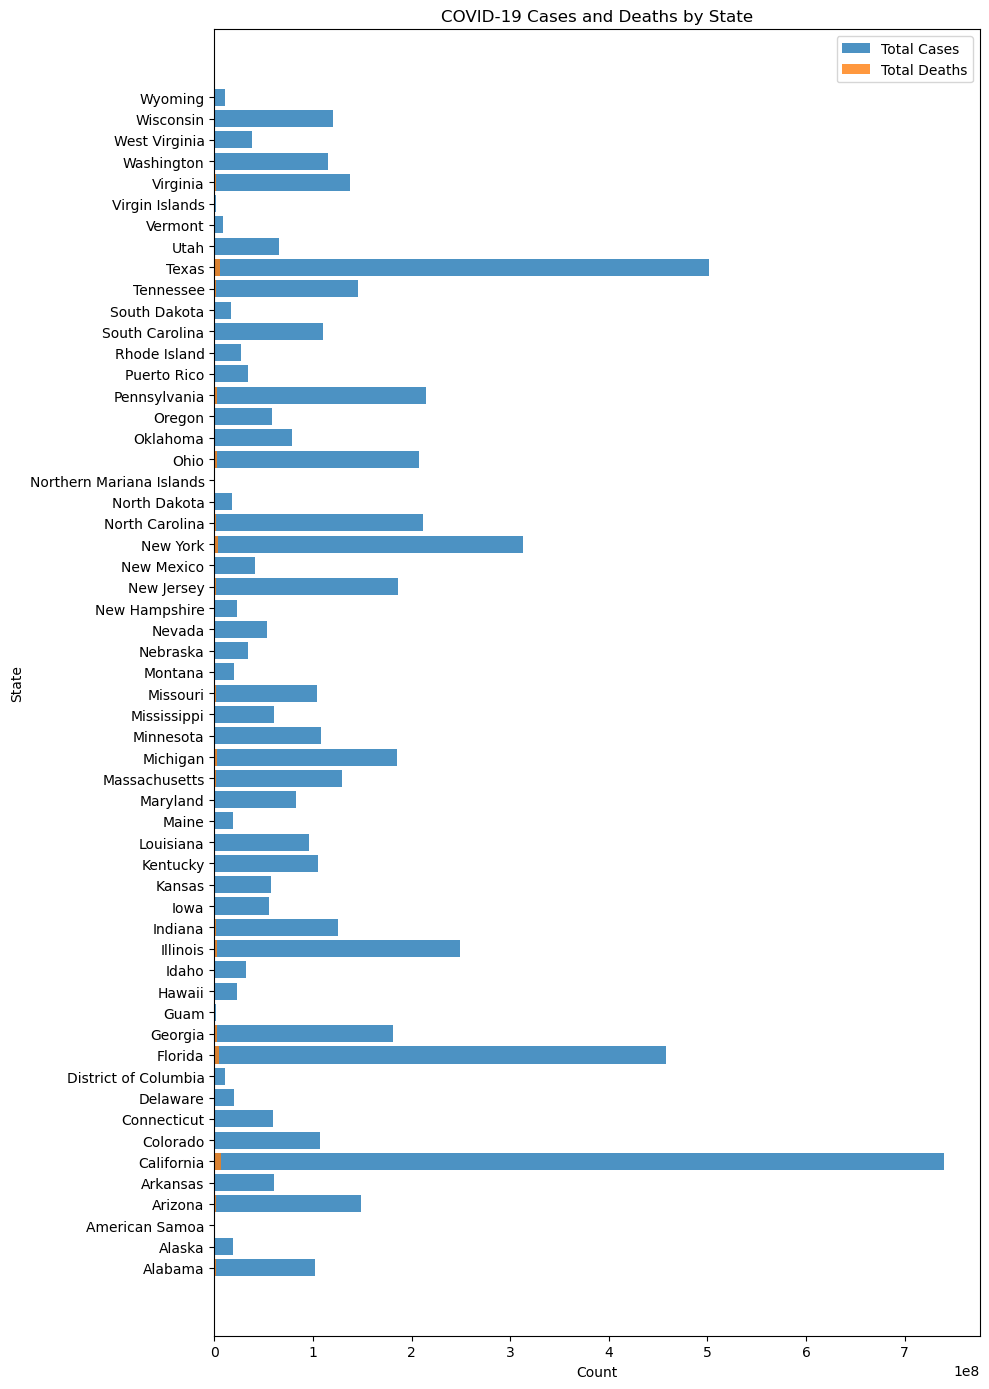

In [121]:
# Retrieve and show covid cases and deaths for U.S. states
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('us_covid_recent_counties.db')

# SQL query
query = """
SELECT state, SUM(cases) AS total_cases, SUM(deaths) AS total_deaths
FROM covid_data_
GROUP BY state;
"""

# Execute query and load into DataFrame
results = pd.read_sql_query(query, conn)


# Visualization (Horizontal Bar Chart)
plt.figure(figsize=(10, 14))  # Adjust figure size
plt.barh(results['state'], results['total_cases'], label='Total Cases', alpha=0.8)
plt.barh(results['state'], results['total_deaths'], label='Total Deaths', alpha=0.8)
plt.xlabel('Count')
plt.ylabel('State')
plt.title('COVID-19 Cases and Deaths by State')
plt.legend()
plt.tight_layout()
plt.show()